# 2.2 Data representations for neural networks

# Tensors --- multidimensional Numpy arrays (dim = axis)

# 2.2.1 Scalars (0D tensors)

In [1]:
# In Numpy, a float32 or float64 number is a scalar tensor
import numpy as np

x = np.array(12)
x

array(12)

In [2]:
# a scalar tensor has 0 axes (we can display it by ndim attribute)

x.ndim

0

### The number of axes of a tensor is also called its *rank*

# 2.2.2 Vectors (1D tensors)

In [3]:
# An array of numbers is called a vector, or 1D tensor (have exactly one axis)

x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [4]:
x.ndim

1

###  The vector has 4 entries and so is called *4-dimensional  vector* (distinguish with 5D tensor !)

# 2.2.3 Matrices (2D tensors)

In [5]:
# An array of vectors is a matrix, or 2D tensor (2 axes, referred as rows and columns)

x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [6]:
x.ndim

2

### The entries from the first axis are called the *rows* , second axis as the *columns* 

# 2.2.4 3D tensors and higher-dimensional tensors

In [7]:
# If we pack matrices in a new array, we obtain a 3D tensor

x = np.array([[[1, 2, 3],
               [4, 5, 6]],
              [[20, 21, 22],
               [23, 24, 25]],
              [[7, 8, 9], 
               [10, 11, 12]]])

In [8]:
x.ndim

3

### By packing 3D tensors in an array, we can create a 4D tensor, and so on. In deep learning, generally we will manipulate tensors from 0D to 4D, although go up to 5D if processing video data.

# 2.2.5 Key attributes

## Three key attributes:
## 1) *Number of axes (rank)* --- e.g. 3D tensor has three axes, also called ndim in Numpy;

## 2) *Shape* --- a tuple of integers that describes how many dimensions the tensor has along each axis. e.g. previous 3D tensor has shape (3, 2, 3), a vector has a shape (5, ) and a scalar has an empty shape ();

## 3) *Data type* --- dtype in Python libraries ( float32, uint8, float64,... ), rarely a char tensor

In [9]:
# we see one example from MNIST

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [10]:
train_images.ndim

3

In [12]:
train_images.shape

(60000, 28, 28)

In [14]:
train_images.dtype

dtype('uint8')

### Here we have is a 3D tensor of 8-bit integers, or more precisely, an array of  60,000 matrices of 28 &times; 28 integers. Each such matrix is a grayscale image, wih coefficients in [0, 255]

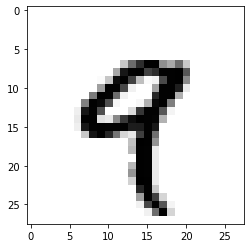

In [16]:
# Let's display the fifth digit in 3D tensor

digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

# 2.2.6 Manipulating tensors in Numpy (*Tensor  slicing*)

In [17]:
# e.g. select digits 10 to 100 (100 is not included) and puts into an array of shape(90, 28, 28)

my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

## some equivalent slicing methods

In [18]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [19]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

## select between any two indices along each tensor axis

In [20]:
# e.g. select 14 * 14 pixels in the bottom-right corner of all images

my_slice = train_images[:, 14:, 14:]

## It's also possible to use negative indices

In [21]:
# e.g. crop the image to patches of 14 * 14  pixels centered in the middle

my_slice = train_images[:, 7:-7, 7:-7]

In [22]:
my_slice.shape

(60000, 14, 14)

# 2.2.7 The notation  of data batches

##  In general, the first axis (axis 0) is the *samples axis* (or *samples dimension*). In MNIST example, samples are images of digits

## deep-learning models don't  process an entire dataset at once; rather, they break data into  small batches

In [23]:
# e.g. one batch of MNIST digits of size 128
batch = train_images[:128]

In [24]:
# then the next batch:
batch = train_images[128:256]

In [ ]:
# and the n-th batch:
batch = train_images[128 * n : 128 * (n + 1)]

## When considering such a batch tensor, the first axis (axis 0) is called the *batch axis* or *batch dimension*

# 2.2.8 Real-world examples of data tensors

## 1) *Vector data*  ---  2D tensors of shape *(samples, features)*
## 2) *Timeseries data or sequence data*  ---  3D tensors of shape *(samples, timesteps, features)*
## 3) *Images*  ---  4D tensors of shape *(samples, height, width, channels)*
## 4) *Video*  ---  5D tensors of shape *(samples, frames, height, width, channels)*

# 2.2.9 Vector data

## The first axis is the * 'samples axis' * and the second axis is the * 'features axis' *

## e.g. we want to encode each person's age, ZIP code, and income (3 elements) of 100,000 people, thus the entire dataset is a 2D tensor of shape (100000, 3)

# 2.2.10 Timeseries data or sequence data

## Whenever time matters in your data (or sequence order), it makes sense to store it in a 3D tensor with an explicit time axis, thus each sample is a sequence of 2D tensors

In [26]:
# one example of stock price
import pandas as pd

stock_price = {'current': [101.5, 108.7, 100.7],
               'high': [110.5, 120.9, 108.6],
               'low': [98.7, 100.6, 89.7]}

stock_sample = pd.DataFrame(stock_price, index = ['time_0', 'time_1', 'time_2'],
                            columns = ['current', 'high', 'low'])
stock_sample

,current,high,low
time_0,101.5,110.5,98.7
time_1,108.7,120.9,100.6
time_2,100.7,108.6,89.7


## The time axis is always the second axis (axis of index 1), by convention.
## e.g. for trading data, 390 minutes in a trading day and 250 days in a year, thus the dataset is a 3D  tensor of shape (250, 390, 3)

#  2.2.11 Image data

## Images generally have 3 dimensions: height, width and color depth (color channels)
## Special cases like our MNIST --- grayscale images which only have a single color channel, thus could be stored in 2D tensors; generally the image tensors are always 3D
## e.g. a batch of 128 color images of size 256 &times; 256 --- shape (128, 256, 256, 3) , 3 is the color channels

## Two conventions (Keras supports both):
## 1) *channels-last* (used by TensorFlow) : (samples, height, width, color_depth)
## 2) *channels-first* (used by Theano) : (samples, color-depth, height, width)

# 2.2.12 Video Data

## A video can be understood as a sequence of frames: each frame being a color image
## Thus frame can be stored in a 3D tensor (height, width, coloor_depth), a sequence of frames is a 4D tensor (frames, height, width, color_depth), thus a batch of different videos can be stored in a 5D tensor (samples, frames, height, width, color_depth)

## e.g. a 60-second, 144 &times; 256 video clip sampled at 4 frames per second --- thus 240 frames in total, a batch of 4 video clips will be stored in a tensor of shape (4, 240, 144, 256, 3) That's a total of 106,168,320 values, if stored in float32, the tensor will be 405MB ! (Videos in real life are typically compressed by a large factor, e.g. MPEG format)

# 2.3 The gears of neural networks: tensor operations

## All transformations learned by deep neutral networks can be reduced to a handful of *tensor operations* , e.g. it's possible to add tensors, multiply tensors and so on.

## In MNIST example, we build the network by stacking Dense layers:

In [ ]:
keras.layers.Dense(512, activation = 'relu')

##  The layers can be interpreted as a function, which takes as input a 2D tensor and returns another 2D tensor --- a new representation by tensor operations.
## Specifically, relu function works as follows: relu(x) = max(x, 0); 

In [ ]:
output = relu(dot(W, input) + b)

# W is a 2D tensor and b is a vector, both attributes of the layer
# then finally a relu operation: relu(x) = max(x, 0)

# 2.3.1 Element-wise operations

In [34]:
x

array([[10, 22],
       [11, 20]])

In [35]:
len(x.shape)

2

## The naive implementation of an element-wise relu operation:

In [36]:
def naive_relu(x):
    assert len(x.shape) == 2  # check x is a 2D tensor 
    
    x = x.copy()  # avoid overwriting the input tensor
    for i in range(x.shape([0])):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

## We can do the same for addition

In [38]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

## But with Numpy,  we can simply apply the built-in functions

In [ ]:
import numpy as np

z = x + y  # element-wise addition

z = np.maximum(z, 0.)  # element-wise relu

# 2.3.2 Broadcasting

## When possible and no ambiguity, the smaller tensor will be *broadcast* to match the shape of the larger tensor; 

## Two steps of broadcasting:
## 1) Axes (called *broadcast axes*) are added to the smaller tensor to match the ndim of the larger tensor;
## 2) The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor

In [39]:
# e.g. x with shape(3, 5), y with shape(5,)

x = np.arange(15).reshape(3, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [40]:
y = np.array([1, 1, 1, 1, 1])

In [41]:
x + y

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

### Broadcasting must first match the lower dimension, otherwise it will fail because of ambiguity

In [42]:
z = np.array([3, 3, 3])
x + z

ValueError: operands could not be broadcast together with shapes (3,5) (3,) 

### The reptition is entirely virtual and no new 2D tensor is created: it happens at the algorithmic level rather than at the memory level.

In [43]:
# a naive implementation would look like as follows:

def naive_add_matrix_and_vector(x, y):
    
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    
    return x 

### Generally, if one tensor has shape (a, b, ... , n, n+1, ... , m) and the other has (n, n+1, ..., m), the broadcasting will then automatically happen for axes *a* through *n -1*

## Other element-wise function also has the same attribute. e.g. maximum()

In [45]:
x = np.random.random((3, 2, 5))
y = np.random.random((2, 5))

z = np.maximum(x, y)

### z will have the shape (3, 2, 5) like x

# 2.3.3 Tensor dot

## An element-wise product is done with \* operator (except TensorFlow .dot), generally we use the standard *dot* operator to do tensor dot

In [ ]:
z = np.dot(x, y)

# or we can use .
z = x . y

## We first see what the dot operations do for two vectors

In [46]:
def naive_vector_dot(x, y):
    
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] *  y[i]
    
    return z

### dot product between  two vectors is a scalar and only vectors with same length are compatible for a dot product

## Then we see a dot product between a matrix x and a vector y, which returns a vector where the coefficients are the dot products between y and the the rows of x 

In [47]:
def naive_matrix_vector_dot(x, y):
    
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y,shape[0]
    
    z = np.zeros(x.shape[0])  # the output will only left with same length of rows of the matrix
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    
    return z 

In [48]:
# or we can use the code written before

def naive_matix_vector_dot(x, y):
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    
    return z

## Of course, a dot product can generalize to tensors with arbitrary number of axes

### e.g. two matrices x and y, first we should let x.shape[1] == y.shape[0], then the output will be in the shape of (x.shape[0], y.shape[1]), where coefficients are the products between the rows of x and columns of y

In [49]:
def naive_matix_dot(x, y):
    
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y,shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            z[i, j] = naive_vector_dot(x[i, :], y[:, j])
    
    return z

## More generally, we take the dot product between higher-dimensional tensors, following the same rules for shape compatibility as 2D case:

## (a, b, c, d) . (d, )  -->  (a, b, c)
## (a, b, c, d) . (d, e)  --> (a, b, c, e)

# 2.3.4  Tensor reshaping 

##  Reshaping means rearanging rows and columns (ndim) of a tensor to match a target shape

In [50]:
x = np.array([[0, 1],
              [2, 3],
              [4, 5]])
x.shape

(3, 2)

In [51]:
x = x.reshape((6, 1))
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [52]:
x = x.reshape((2, 3))
x

array([[0, 1, 2],
       [3, 4, 5]])

## One special case is about *transposition*

In [53]:
x = np.zeros((300, 20))
x = np.transpose(x)

x.shape

(20, 300)